# Regresja liniowa

W modelu liniowym zależność między $Y$ a $X_1, ..., X_p$ modelujemy jako:

$$Y=\beta_0 + \beta_1 X_1 + ... + \beta_p X_p + \epsilon$$

Wartości współczynników $\beta_0, ..., \beta_p$ szacowane są metodą "najmniejszych kwadratów", w której minimalizowana jest wartość $RSS$ (*Residual Sum of Squares*):

$$RSS=\sum_{i = 1}^n (y_i - \hat{y_i})^2$$



## Model liniowy w `statsmodels`

Wykorzystamy zbiór [mtcars](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars).
W pierwszym przykładzie tworzymy model w postaci: 

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} $$

In [1]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("mtcars.csv")

y = df.mpg
X = sm.add_constant(df.hp)

print(X.head())
print()
print(y.head())

   const   hp
0    1.0  110
1    1.0  110
2    1.0   93
3    1.0  110
4    1.0  175

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64


In [2]:
lm = sm.OLS(y, X)
lm_fit = lm.fit()

Procedura `fit` zwraca obiekt typu [`RegressionResults`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html).

W podsumowaniu (`summary()`) podane są m.in. wartość $R^2$ oraz $p$-wartości szacowanych współczynników.

In [3]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           1.79e-07
Time:                        18:43:54   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Współczynniki $\hat{\beta_0}$ i $\hat{\beta_1}$ zapisane są w `lm_fit.params`.

In [4]:
lm_fit.params

const    30.098861
hp       -0.068228
dtype: float64

Reszty (*residuals*) zapisane są w `lm_fit.resid`.

In [5]:
lm_fit.resid.head()

0   -1.593750
1   -1.593750
2   -0.953631
3   -1.193750
4    0.541088
dtype: float64

W ocenie modelu przydatna jest także wizualizacja.

Text(0, 0.5, 'Residual')

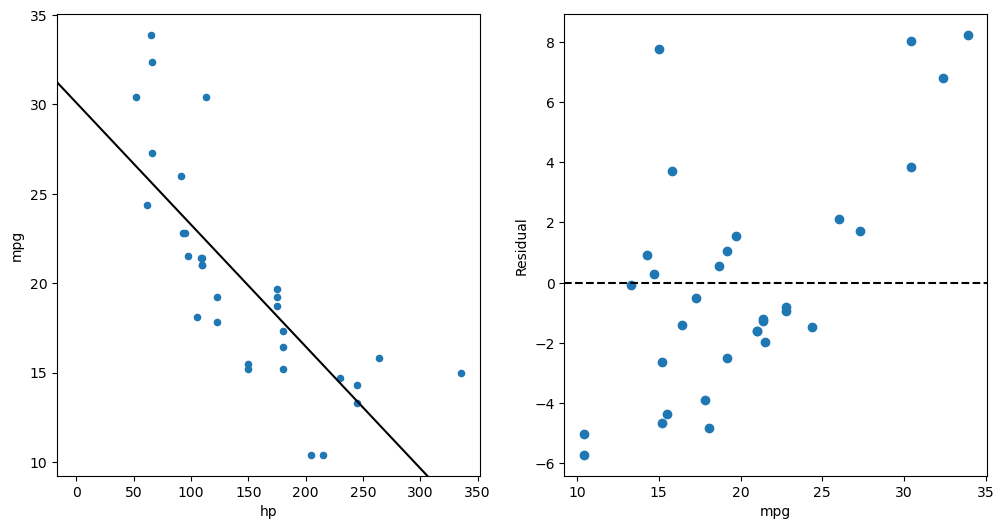

In [6]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df.plot(kind='scatter', y='mpg', x='hp', ax=ax1)
(b0, b1) = lm_fit.params

ax1.axline(xy1=(0,b0), slope=b1, color='k')

ax2.scatter(df.mpg, lm_fit.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('mpg')
ax2.set_ylabel('Residual')

Metoda `predict()` pozwala na predykcję wartości `mpg` dla nowych danych.

In [7]:
X_new = sm.add_constant([100, 150])
y_pred = lm_fit.predict(X_new)
y_pred

array([23.27603273, 19.86461883])

Tworząc model zawierający wiele zmiennych możemy skorzystać z `statsmodels.formula.api`, które pozwala podać 'wzór' modelu zamiast manualnie przygotowywać dane wejściowe. 
$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{cyl}$$

In [8]:
import statsmodels.formula.api as smf

lm1 = smf.ols(formula="mpg ~ hp + cyl", data=df)
lm_fit1 = lm1.fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     41.42
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           3.16e-09
Time:                        18:43:55   Log-Likelihood:                -80.781
No. Observations:                  32   AIC:                             167.6
Df Residuals:                      29   BIC:                             172.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9083      2.191     16.847      0.000      32.428      41.389
hp            -0.0191      0.015     -1.275      0.213      -0.050       0.012
cyl           -2.2647      0.576     -3.933      0.000      -3.443      -1.087
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.092
Skew:                           0.411   Prob(JB):                        0.579
Kurtosis:                       2.623   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Względem poprzedniego modelu wartość $R^2$ wzrosła z $0.602$ do $0.741$. Zwróćmy uwagę, że $p$-wartość współczynnika `hp` wynosi 0.213, co sugeruje, że nie ma zależności między `mpg` a `hp`, mimo że wykryliśmy taką zależność w modelu jednoczynnikowym. Jest to spowodowane liniową współzależnością między zmiennymi.

<Axes: >

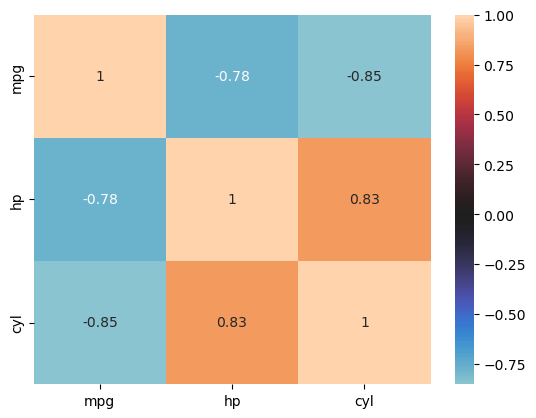

In [9]:
import seaborn as sns
sns.heatmap(df[["mpg", "hp", "cyl"]].corr(), annot=True, center=0.0)

Rozważmy alternatywny model:

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{wt}$$

In [10]:
lm2 = smf.ols(formula="mpg ~ hp + wt", data=df)
lm_fit2 = lm2.fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           9.11e-12
Time:                        18:43:55   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model wielomianowy

Na wykresie stworzonym dla modelu `mpg ~ hp` widać, że faktyczna zależność między zmiennymi wyraźnie nieliniowa. Sprawdźmy, czy lepiej sprawdzi się poniższy model wielomianowy. 

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{hp}^2$$

In [11]:
lm3 = smf.ols(formula="mpg ~ hp + I(hp**2)", data=df)

lm_fit3 = lm3.fit()

lm_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     44.95
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           1.30e-09
Time:                        18:43:55   Log-Likelihood:                -79.801
No. Observations:                  32   AIC:                             165.6
Df Residuals:                      29   BIC:                             170.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.4091      2.741     14.744      0.000      34.804      46.015
hp            -0.2133      0.035     -6.115      0.000      -0.285      -0.142
I(hp ** 2)     0.0004   9.84e-05      4.275      0.000       0.000       0.001
==============================================================================
Omnibus:                        6.211   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.579
Skew:                           0.844   Prob(JB):                        0.101
Kurtosis:                       3.767   Cond. No.                     1.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'residual')

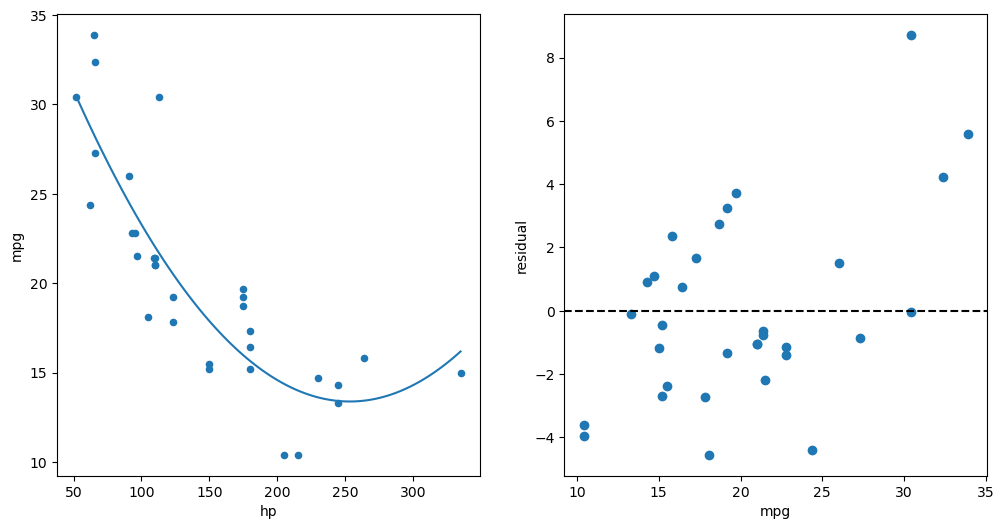

In [12]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df.plot(kind='scatter', y='mpg', x='hp', ax=ax1)

x_plot = np.linspace(df.hp.min(), df.hp.max(), 100)
b0, b1, b2 = lm_fit3.params
y_plot = b0 + b1 * x_plot + b2 * x_plot**2
ax1.plot(x_plot, y_plot)

ax2.scatter(df.mpg, lm_fit3.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('mpg')
ax2.set_ylabel('residual')

## Modelowanie interakcji między zmiennymi

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{wt} + \hat{\beta_3} \mathtt{hp} \cdot \mathtt{wt}$$

In [13]:
lm4 = smf.ols(formula="mpg ~ hp + wt + hp:wt", data=df) # Możemy też wykorzystać formula="mpg ~ hp*wt"

lm_fit4 = lm4.fit()

lm_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     71.66
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           2.98e-13
Time:                        18:43:56   Log-Likelihood:                -67.805
No. Observations:                  32   AIC:                             143.6
Df Residuals:                      28   BIC:                             149.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8084      3.605     13.816      0.000      42.424      57.193
hp            -0.1201      0.025     -4.863      0.000      -0.171      -0.070
wt            -8.2166      1.270     -6.471      0.000     -10.818      -5.616
hp:wt          0.0278      0.007      3.753      0.001       0.013       0.043
==============================================================================
Omnibus:                        2.221   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.736
Skew:                           0.407   Prob(JB):                        0.420
Kurtosis:                       2.200   Cond. No.                     6.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Zadania (Ćwiczenia 07)
1. Wczytaj zbiór danych w pliku `boston.csv` ([opis](https://www.rdocumentation.org/packages/MASS/versions/7.3-58.3/topics/Boston)), a następnie modeluj zależność `medv` od pozostałych zmiennych.
    - Dokonaj manualnej selekcji modelu. Porównaj 4-5 modeli z jedną lub wieloma zmiennymi.
    - Przeprowadź diagnostykę modeli.
        - W `summary()` zwróć uwagę m.in. na $R^2$ oraz współczynniki i ich p-wartości.
        - Stwórz wykresy rezyduów.
    - Zanotuj obserwacje.

## Zadania (Ćwiczenia 08)
1. Dla danych `boston` stwórz modele nieliniowe (np. wielomianowe) i modele zawierające interakcje. Przeprowadź ich diagnostykę i porównaj z modelami stworzonymi we wcześniejszym zadaniu.
2. Zaimplementuj metodę forward selection i zastosuj ją dla danych `boston`. Do porównania/ewaluacji modeli można stosować np. miarę Adjusted $R^2$ lub zbiór walidacyjny.
3. Wczytaj zbiór danych w pliku `housing.csv`, 
    - Usuń wiersze zawierające brakujące dane (lub zastąp wartością średnią).
    - Koduj zmienną `ocean_proximity` (np. metodą `get_dummies()`).
    - Modeluj zależność `median_house_value` od `ocean_proximity`.

<Axes: >

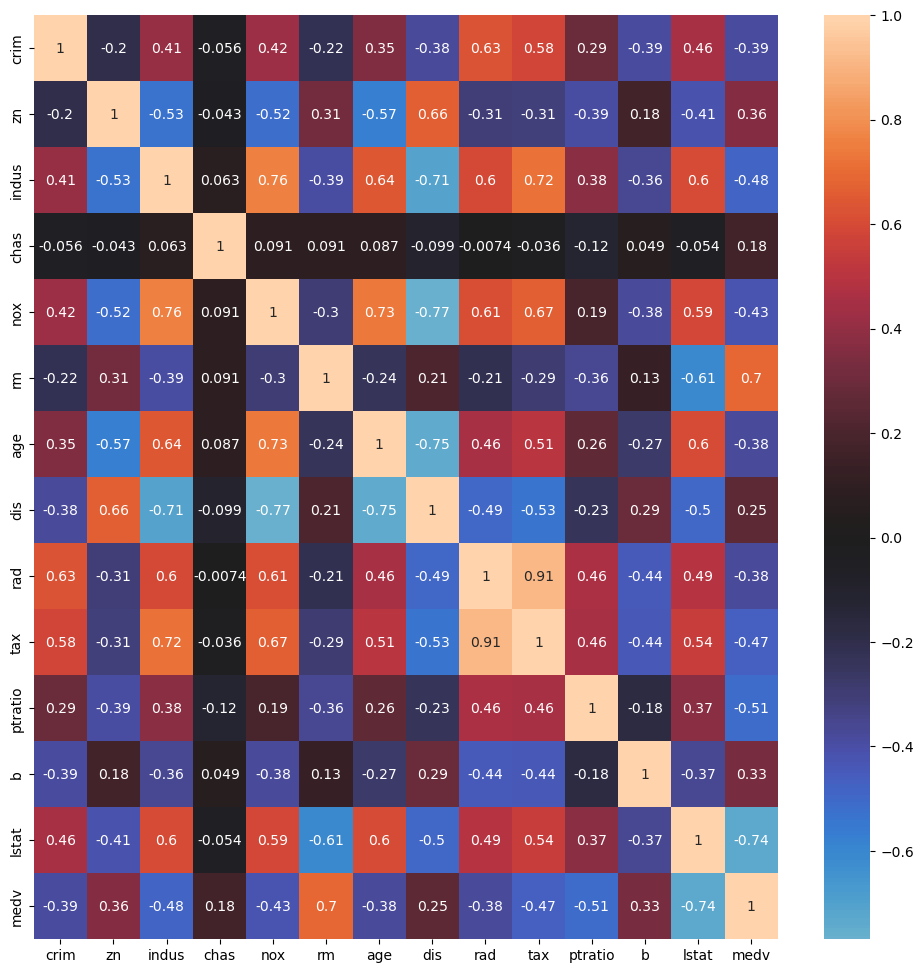

In [14]:
import seaborn as sns
df = pd.read_csv("boston.csv")
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, center=0.0, ax=ax)